In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

pytorch document 웹사이트 : https://pytorch.org/docs/stable/index.html

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [3]:
EPOCHS = 20
BATCH_SIZE = 64

In [4]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [6]:
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE
)

In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

(224, 224, 3)


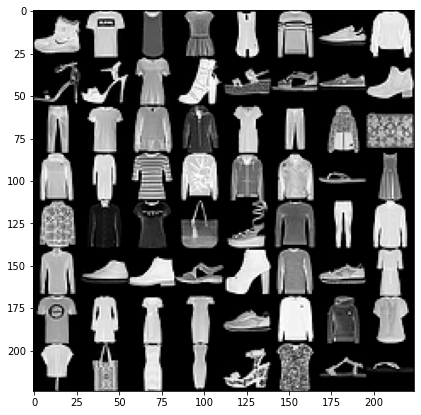

In [8]:
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(7, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
print(np.transpose(npimg, (1,2,0)).shape)
plt.show()

In [9]:
for i, label in enumerate(labels):
    print("{}".format(label.item()), end=' ')
    if i % 8 == 7:
        print()

9 0 0 3 0 2 7 2 
5 5 0 9 5 5 7 9 
1 0 6 4 3 1 4 8 
4 3 0 2 4 4 5 3 
6 6 0 8 5 2 1 6 
6 7 9 5 9 2 7 3 
0 3 3 3 7 2 2 6 
6 8 3 3 5 0 5 5 


In [10]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for i, label in enumerate(labels):
    index = label.item()
    print("{:12}".format(CLASSES[index]), end=' ')
    if i % 8 == 7:
        print()

Ankle boot   T-shirt/top  T-shirt/top  Dress        T-shirt/top  Pullover     Sneaker      Pullover     
Sandal       Sandal       T-shirt/top  Ankle boot   Sandal       Sandal       Sneaker      Ankle boot   
Trouser      T-shirt/top  Shirt        Coat         Dress        Trouser      Coat         Bag          
Coat         Dress        T-shirt/top  Pullover     Coat         Coat         Sandal       Dress        
Shirt        Shirt        T-shirt/top  Bag          Sandal       Pullover     Trouser      Shirt        
Shirt        Sneaker      Ankle boot   Sandal       Ankle boot   Pullover     Sneaker      Dress        
T-shirt/top  Dress        Dress        Dress        Sneaker      Pullover     Pullover     Shirt        
Shirt        Bag          Dress        Dress        Sandal       T-shirt/top  Sandal       Sandal       


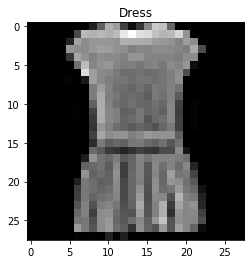

In [11]:
idx = 3

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg, cmap='gray')
plt.show()

## 아래 함수를 완성해보세요. 활용이 가능하신 분은 Baseline으로 제시된 성능 보다 더 나은 성능을 내보세요.

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [13]:
model = Net().to(DEVICE)

In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma = 0.1)

In [15]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [16]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            pred = output.max(dim=1)[1]
            correct += pred.eq(target).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [17]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.8326, Accuracy: 69.38%
[2] Test Loss: 0.6602, Accuracy: 77.13%
[3] Test Loss: 0.5887, Accuracy: 79.66%
[4] Test Loss: 0.5536, Accuracy: 80.42%
[5] Test Loss: 0.5333, Accuracy: 80.92%
[6] Test Loss: 0.5184, Accuracy: 81.48%
[7] Test Loss: 0.5060, Accuracy: 81.82%
[8] Test Loss: 0.4954, Accuracy: 82.20%
[9] Test Loss: 0.4856, Accuracy: 82.57%
[10] Test Loss: 0.4768, Accuracy: 82.80%
[11] Test Loss: 0.4677, Accuracy: 83.17%
[12] Test Loss: 0.4586, Accuracy: 83.52%
[13] Test Loss: 0.4510, Accuracy: 83.84%
[14] Test Loss: 0.4440, Accuracy: 84.06%
[15] Test Loss: 0.4374, Accuracy: 84.34%
[16] Test Loss: 0.4311, Accuracy: 84.70%
[17] Test Loss: 0.4249, Accuracy: 84.85%
[18] Test Loss: 0.4197, Accuracy: 85.11%
[19] Test Loss: 0.4142, Accuracy: 85.26%
[20] Test Loss: 0.4096, Accuracy: 85.37%


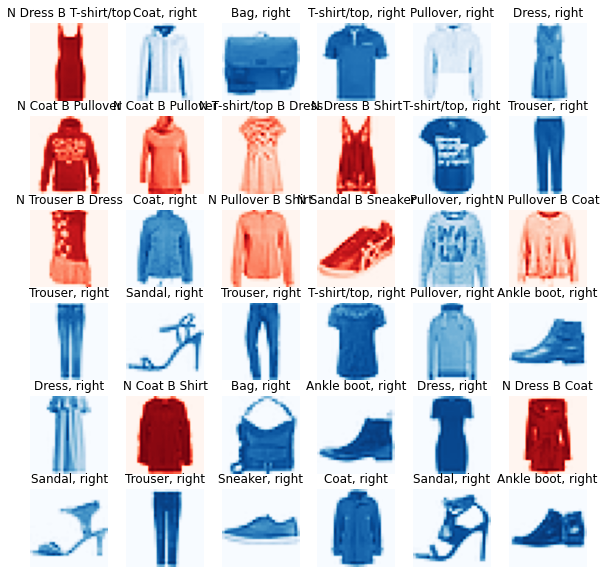

In [18]:
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))
 
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(testset))
    input_img = testset[data_idx][0].unsqueeze(dim=0).to(DEVICE) 
 
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = CLASSES[argmax.item()]
    label = CLASSES[testset[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right')
        cmap = 'Blues'
    else:
        plt.title('N ' + pred + ' B ' +  label)
        cmap = 'Reds'
    plot_img = testset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 

## MNIST dataset에 대해서도 적용해봅시다!

In [27]:
CLASSES = {
    0: 'zero',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine'
}

for i, label in enumerate(labels):
    index = label.item()
    print("{:12}".format(CLASSES[index]), end=' ')
    if i % 8 == 7:
        print()

nine         zero         zero         three        zero         two          seven        two          
five         five         zero         nine         five         five         seven        nine         
one          zero         six          four         three        one          four         eight        
four         three        zero         two          four         four         five         three        
six          six          zero         eight        five         two          one          six          
six          seven        nine         five         nine         two          seven        three        
zero         three        three        three        seven        two          two          six          
six          eight        three        three        five         zero         five         five         


In [23]:
trainset = datasets.MNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)

testset = datasets.MNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [25]:
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE
)

In [26]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.3320, Accuracy: 90.41%
[2] Test Loss: 0.2580, Accuracy: 92.46%
[3] Test Loss: 0.2230, Accuracy: 93.65%
[4] Test Loss: 0.2001, Accuracy: 94.34%
[5] Test Loss: 0.1833, Accuracy: 94.78%
[6] Test Loss: 0.1702, Accuracy: 95.03%
[7] Test Loss: 0.1594, Accuracy: 95.38%
[8] Test Loss: 0.1502, Accuracy: 95.57%
[9] Test Loss: 0.1422, Accuracy: 95.80%
[10] Test Loss: 0.1351, Accuracy: 95.98%
[11] Test Loss: 0.1291, Accuracy: 96.16%
[12] Test Loss: 0.1235, Accuracy: 96.31%
[13] Test Loss: 0.1186, Accuracy: 96.48%
[14] Test Loss: 0.1144, Accuracy: 96.63%
[15] Test Loss: 0.1104, Accuracy: 96.75%
[16] Test Loss: 0.1068, Accuracy: 96.78%
[17] Test Loss: 0.1036, Accuracy: 96.82%
[18] Test Loss: 0.1006, Accuracy: 96.89%
[19] Test Loss: 0.0980, Accuracy: 96.97%
[20] Test Loss: 0.0954, Accuracy: 97.03%


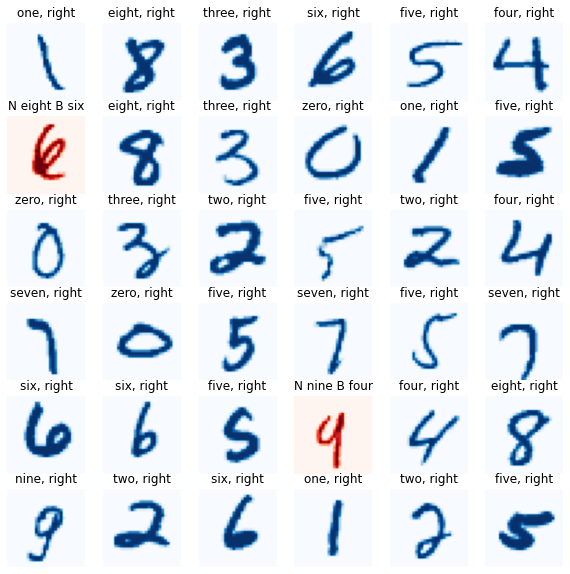

In [28]:
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))
 
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(testset))
    input_img = testset[data_idx][0].unsqueeze(dim=0).to(DEVICE) 
 
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = CLASSES[argmax.item()]
    label = CLASSES[testset[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right')
        cmap = 'Blues'
    else:
        plt.title('N ' + pred + ' B ' +  label)
        cmap = 'Reds'
    plot_img = testset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 